In [ ]:
from keras.models import Model
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.datasets import cifar10
import keras
import cv2

import numpy as np
import matplotlib.pyplot as plt


In [2]:
batch_size = 32 # in each iteration, we consider 32 training examples at once
num_epochs = 200 # we iterate 200 times over the entire training set
kernel_size = 3 # we will use 3x3 kernels throughout
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth_1 = 32 # we will initially have 32 kernels per conv. layer...
conv_depth_2 = 64 # ...switching to 64 after the first pooling layer
drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
drop_prob_2 = 0.5 # dropout in the dense layer with probability 0.5
hidden_size = 512 # the dense layer will have 512 neurons

In [18]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data() # fetch CIFAR-10 data
class_names = [
    'Airplane',
    'Automobile',
    'Bird',
    'Cat',
    'Deer',
    'Dog',
    'Frog',
    'Horse',
    'Ship',
    'Truck'
]

int_to_lab = {i:cl for i,cl in enumerate(class_names)}

num_train, depth, height, width = X_train.shape # there are 50000 training examples in CIFAR-10
num_test = X_test.shape[0] # there are 10000 test examples in CIFAR-10
num_classes = np.unique(y_train).shape[0] # there are 10 image classes
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= np.max(X_train) # Normalise data to [0, 1] range
X_test /= np.max(X_test) # Normalise data to [0, 1] range
# Y_train = np_utils.to_categorical(y_train, num_classes) # One- hot encode the labels
# Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

In [4]:
inp = Input(shape=(depth, height, width)) # N.B. depth goes first in Keras 
# Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer) 
conv_1 = Convolution2D(conv_depth_1,  kernel_size,  kernel_size, padding='same', activation='relu')(inp) 
conv_2 = Convolution2D(conv_depth_1,  kernel_size,  kernel_size, padding='same', activation='relu')(conv_1) 
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2) 
drop_1 = Dropout(drop_prob_1)(pool_1) 
# Conv [64] -> Conv [64] -> Pool (with dropout on the pooling layer) 
conv_3 = Convolution2D(conv_depth_2,  kernel_size,  kernel_size, padding='same', activation='relu')(drop_1) 
conv_4 = Convolution2D(conv_depth_2,  kernel_size,  kernel_size, padding='same', activation='relu')(conv_3) 
# pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4) 
drop_2 = Dropout(drop_prob_1)(conv_4) 
# Now flatten to 1D, apply Dense -> ReLU (with dropout) -> softmax 
flat = Flatten()(drop_2) 
hidden = Dense(hidden_size, activation='relu')(flat)
drop_3 = Dropout(drop_prob_2)(hidden) 
out = Dense(num_classes, activation='softmax')(drop_3) 
model = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers 
model.compile(loss='sparse_categorical_crossentropy', # using the cross-entropy loss function 
              optimizer='adam', # using the Adam optimiser 
              metrics=['accuracy']) # reporting the accuracy 
h = model.fit(X_train, y_train, # Train the model using the training set... 
          batch_size=batch_size, epochs=num_epochs, 
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation 
model.evaluate(X_test, y_test, verbose=1) # Evaluate the trained model on the test set!


Epoch 1/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2189 - loss: 2.0550 - val_accuracy: 0.3696 - val_loss: 1.7089
Epoch 2/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3593 - loss: 1.7243 - val_accuracy: 0.4194 - val_loss: 1.5885
Epoch 3/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3958 - loss: 1.6382 - val_accuracy: 0.4434 - val_loss: 1.5007
Epoch 4/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4204 - loss: 1.5829 - val_accuracy: 0.4510 - val_loss: 1.4896
Epoch 5/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4343 - loss: 1.5545 - val_accuracy: 0.4830 - val_loss: 1.4283
Epoch 6/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4462 - loss: 1.5129 - val_accuracy: 0.4744 - val_loss: 1.4512
Epoch 7/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4535 - loss: 1.5002 - val_accuracy: 0.4848 - val_loss: 1.4045
Epoch 8/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4582 - loss: 1

KeyboardInterrupt: 

# No drop

In [ ]:
inp = Input(shape=(depth, height, width)) # N.B. depth goes first in Keras 
# Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer) 
conv_1 = Convolution2D(conv_depth_1,  kernel_size,  kernel_size, padding='same', activation='relu')(inp) 
conv_2 = Convolution2D(conv_depth_1,  kernel_size,  kernel_size, padding='same', activation='relu')(conv_1) 
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2) 

# Conv [64] -> Conv [64] -> Pool (with dropout on the pooling layer) 
conv_3 = Convolution2D(conv_depth_2,  kernel_size,  kernel_size, padding='same', activation='relu')(pool_1) 
conv_4 = Convolution2D(conv_depth_2,  kernel_size,  kernel_size, padding='same', activation='relu')(conv_3) 
# pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4) 

# Now flatten to 1D, apply Dense -> ReLU (with dropout) -> softmax 
flat = Flatten()(conv_4) 
hidden = Dense(hidden_size, activation='relu')(flat)

out = Dense(num_classes, activation='softmax')(hidden) 
model = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers 
model.compile(loss='sparse_categorical_crossentropy', # using the cross-entropy loss function 
              optimizer='adam', # using the Adam optimiser 
              metrics=['accuracy']) # reporting the accuracy 
h2 = model.fit(X_train, y_train, # Train the model using the training set... 
          batch_size=batch_size, epochs=num_epochs, 
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation 
model.evaluate(X_test, y_test, verbose=1) # Evaluate the trained model on the test set!


Epoch 1/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2596 - loss: 1.9487 - val_accuracy: 0.3990 - val_loss: 1.5845
Epoch 2/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4089 - loss: 1.5850 - val_accuracy: 0.4472 - val_loss: 1.4932
Epoch 3/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4527 - loss: 1.4797 - val_accuracy: 0.4746 - val_loss: 1.4283
Epoch 4/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4785 - loss: 1.4112 - val_accuracy: 0.4768 - val_loss: 1.4534
Epoch 5/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5051 - loss: 1.3564 - val_accuracy: 0.4928 - val_loss: 1.3682
Epoch 6/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5241 - loss: 1.3094 - val_accuracy: 0.5116 - val_loss: 1.3259
Epoch 7/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5319 - loss: 1.2881 - val_accuracy: 0.5208 - val_loss: 1.3182
Epoch 8/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5436 - loss: 1

[2197.430419921875, 0.25589999556541443]

# Another conv sizes

In [ ]:
new_kernel_size = 5

inp = Input(shape=(depth, height, width)) # N.B. depth goes first in Keras 
# Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer) 
conv_1 = Convolution2D(conv_depth_1,  new_kernel_size,  new_kernel_size, padding='same', activation='relu')(inp) 
conv_2 = Convolution2D(conv_depth_1,  new_kernel_size,  new_kernel_size, padding='same', activation='relu')(conv_1) 
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2) 
drop_1 = Dropout(drop_prob_1)(pool_1) 
# Conv [64] -> Conv [64] -> Pool (with dropout on the pooling layer) 
conv_3 = Convolution2D(conv_depth_2,  new_kernel_size,  new_kernel_size, padding='same', activation='relu')(drop_1) 
conv_4 = Convolution2D(conv_depth_2,  new_kernel_size,  new_kernel_size, padding='same', activation='relu')(conv_3) 
# pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4) 
drop_2 = Dropout(drop_prob_1)(conv_4) 
# Now flatten to 1D, apply Dense -> ReLU (with dropout) -> softmax 
flat = Flatten()(drop_2) 
hidden = Dense(hidden_size, activation='relu')(flat)
drop_3 = Dropout(drop_prob_2)(hidden) 
out = Dense(num_classes, activation='softmax')(drop_3) 
model = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers 
model.compile(loss='sparse_categorical_crossentropy', # using the cross-entropy loss function 
              optimizer='adam', # using the Adam optimiser 
              metrics=['accuracy']) # reporting the accuracy 
h3 = model.fit(X_train, y_train, # Train the model using the training set... 
          batch_size=batch_size, epochs=num_epochs, 
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation 
model.evaluate(X_test, y_test, verbose=1) # Evaluate the trained model on the test set!


Epoch 1/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1755 - loss: 2.1335 - val_accuracy: 0.3268 - val_loss: 1.8045
Epoch 2/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3232 - loss: 1.8183 - val_accuracy: 0.4104 - val_loss: 1.6332
Epoch 3/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3662 - loss: 1.7131 - val_accuracy: 0.4212 - val_loss: 1.5978
Epoch 4/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3907 - loss: 1.6483 - val_accuracy: 0.4542 - val_loss: 1.5053
Epoch 5/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4122 - loss: 1.6049 - val_accuracy: 0.4694 - val_loss: 1.4761
Epoch 6/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4166 - loss: 1.5845 - val_accuracy: 0.4766 - val_loss: 1.4509
Epoch 7/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4319 - loss: 1.5501 - val_accuracy: 0.4782 - val_loss: 1.4542
Epoch 8/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4401 - loss: 1

[785.2131958007812, 0.28369998931884766]

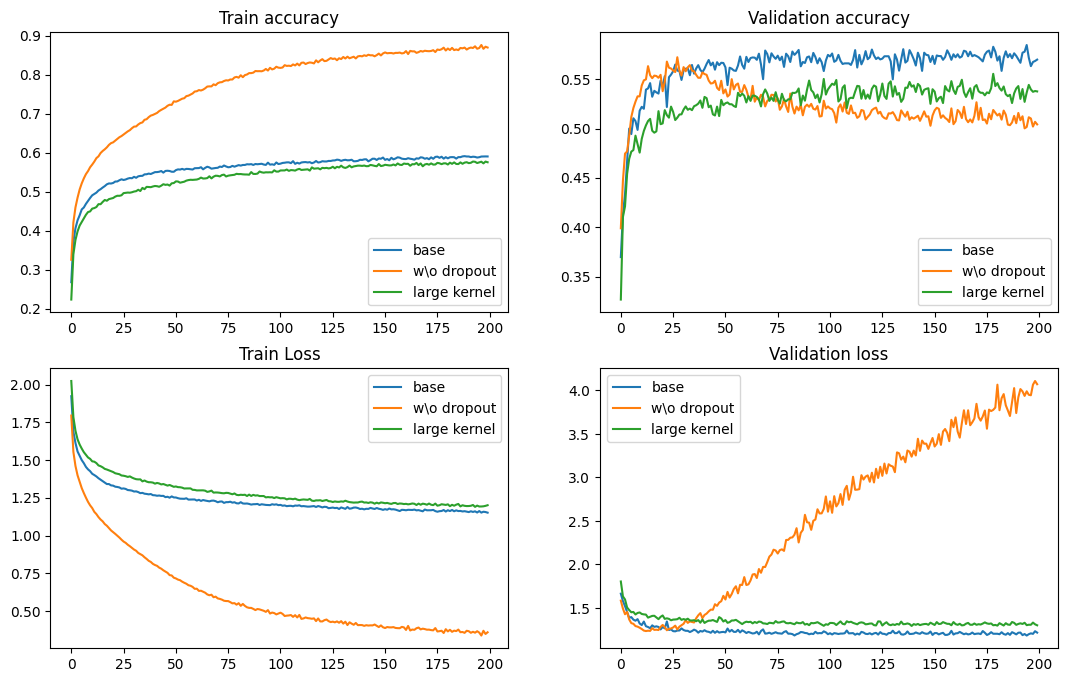

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(13,8))

ax[0, 0].plot(h.history["accuracy"], label="base")
ax[0, 0].plot(h2.history["accuracy"], label="w\o dropout")
ax[0, 0].plot(h3.history["accuracy"], label="large kernel")
ax[0, 0].set_title("Train accuracy")
ax[0, 0].legend()

ax[0, 1].plot(h.history["val_accuracy"], label="base")
ax[0, 1].plot(h2.history["val_accuracy"], label="w\o dropout")
ax[0, 1].plot(h3.history["val_accuracy"], label="large kernel")
ax[0, 1].set_title("Validation accuracy")
ax[0, 1].legend()

ax[1, 0].plot(h.history["loss"], label="base")
ax[1, 0].plot(h2.history["loss"], label="w\o dropout")
ax[1, 0].plot(h3.history["loss"], label="large kernel")
ax[1, 0].set_title("Train Loss")
ax[1, 0].legend()

ax[1, 1].plot(h.history["val_loss"], label="base")
ax[1, 1].plot(h2.history["val_loss"], label="w\o dropout")
ax[1, 1].plot(h3.history["val_loss"], label="large kernel")
ax[1, 1].set_title("Validation loss")
ax[1, 1].legend()

plt.show()

In [ ]:
loaded_model = keras.saving.load_model("./models/cifar.keras")

In [8]:
X_test[0].shape

(32, 32, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


'Ship'

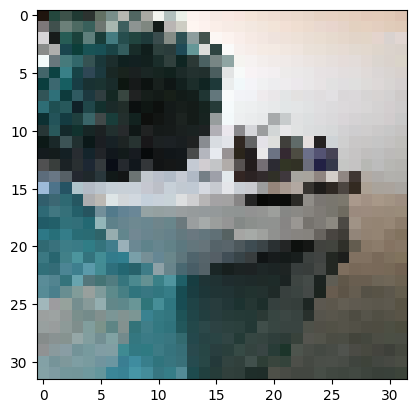

In [20]:
def user_input(model, img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (32, 32))
    img = img / 255
    plt.imshow(img)
    return np.argmax(model.predict(np.expand_dims(img,0)))

int_to_lab[user_input(model, img_path="../img/boat.jpg")]